In [4]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

/Users/manabu/.pyenv/versions/anaconda3-2021.11/envs/jb/lib/python3.9/site-packages/IPython/core/magics/logging.py:130: UserWarning: Couldn't start log: Log file is already active: ./20220712.log
  warn("Couldn't start log: %s" % sys.exc_info()[1])


# サイクロイドのアニメーション作成

* [Python Matplotlib Tips: Draw cycloid animation using matplotlib.animation.ArtistAnimation](https://pythonmatplotlibtips.blogspot.com/2017/12/cycloid-animation-artistanimation.html)
* [[matplotlib animation] 13. サイクロイド(cycloid) – サボテンパイソン](https://sabopy.com/py/matplotlib-animation-13/)

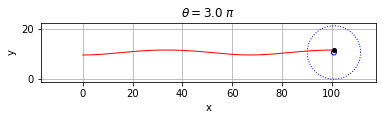

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

def update(num):
    if len(round_circles) > 0:
        round_circles.pop().remove()
        round_circles2.pop().remove()
        cycloids.pop().remove()
        points.pop().remove()
        
    round_circle,  = plt.plot(cycloid_c[num]+x,  R+y,  'b:', lw=1)
    round_circle2, = plt.plot(cycloid_c[num]+x2, R+y2, 'b-', lw=1)
    cycloid, = plt.plot(cycloid_x[:num+1] ,cycloid_y[:num+1], 'r-', lw=1)
    point, = plt.plot(cycloid_x[num], cycloid_y[num], 'ko', markersize=4)
    
    round_circles.append(round_circle)
    round_circles2.append(round_circle2)
    cycloids.append(cycloid)
    points.append(point)
    
    theta_str = r'$\theta=$'
    ax.set_title(theta_str + str(theta[num]/np.pi)[:4] + str(r' $\pi$'))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

#plot data
#e = 0.0167 # earth
e = 0.0935 # mars
#e = 0.9673 # 1P/Halley
#e=0.6
a = 1
b = np.sqrt(a**2-e**2)
R = a/e
theta = np.linspace(0,3*np.pi,200)
phi   = np.linspace(0,2*np.pi,100)

x = R*np.cos(phi)
y = R*np.sin(phi)
round_circles =[]

x2 = R*np.cos(phi)*e
y2 = R*np.sin(phi)*e
round_circles2 =[]

cycloid_x = R*e*(1/e*theta-np.sin(theta))
cycloid_y = R*(1-np.cos(theta)*e)
cycloids=[]

cycloid_c = R*theta
points=[]

ani = animation.FuncAnimation(fig, update, 200, interval=100)
HTML(ani.to_html5_video())